#  Logistic Regression Using Gradient Descent 

### Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)

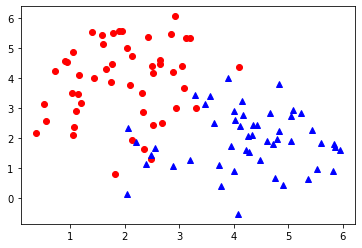

In [3]:
#Visualize dataset 
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')
plt.show()

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    
    
def objective(m, y, A):
    cost = -(1/m)*np.sum(y*np.log(A) + (1-y)*np.log(1-A))
    return cost

def jacobian(X, y, weights, sigmoid_val):
    j = (1/X.shape[0])*np.dot(sigmoid_val-y, X)
    return j

In [5]:
def gradient_descent(X, y, learning_rate, max_iterations, tolerance):
    
    X = np.hstack((X,np.ones((X.shape[0],1))))
    weights = np.zeros(X.shape[1])
    old_weights = np.array(weights)
    costs = []
    
    for _ in range(max_iterations):
        
        val = weights @ X.T
        sigmoid_val = sigmoid(val)
        
        weights = weights - learning_rate * jacobian(X, y, weights, sigmoid_val)
        
        costs.append(objective(X.shape[0], y, sigmoid_val))
        error = np.sqrt(np.sum(np.square(weights-old_weights))) / weights.shape[0]
        
        if error < tolerance:
            print('\nConverged at iteration: '+str(_))
            print('Weights obtained are: ', weights)
            break
        
        if _%100000==0:
            m1 = 'ITERATION: ' + str(_)
            m2 = 'COST: ' + str(costs[-1])
            print(m1, ' '*(20-len(m1)), m2)
            
        old_weights = np.copy(weights)
    
    return costs, weights

In [6]:
learning_rate = 1e-3
tolerance = 1e-8
max_iterations = 10000000

costs, weights = gradient_descent(X, y, learning_rate, max_iterations, tolerance)

ITERATION: 0          COST: 0.6931471805599453
ITERATION: 100000     COST: 0.15905422217793017
ITERATION: 200000     COST: 0.15108128443880076
ITERATION: 300000     COST: 0.14687325134256501
ITERATION: 400000     COST: 0.1445116735436042
ITERATION: 500000     COST: 0.14312182921730102
ITERATION: 600000     COST: 0.14227171311518144
ITERATION: 700000     COST: 0.14173571567481685
ITERATION: 800000     COST: 0.14138963853259875
ITERATION: 900000     COST: 0.14116195894296954
ITERATION: 1000000    COST: 0.14100992291438208
ITERATION: 1100000    COST: 0.1409071790335408
ITERATION: 1200000    COST: 0.1408370730292444
ITERATION: 1300000    COST: 0.14078886028306098
ITERATION: 1400000    COST: 0.14075549029751305
ITERATION: 1500000    COST: 0.1407322713746444
ITERATION: 1600000    COST: 0.1407160450318789
ITERATION: 1700000    COST: 0.14070466436624257
ITERATION: 1800000    COST: 0.14069665831173983
ITERATION: 1900000    COST: 0.14069101211308982
ITERATION: 2000000    COST: 0.1406870218501060

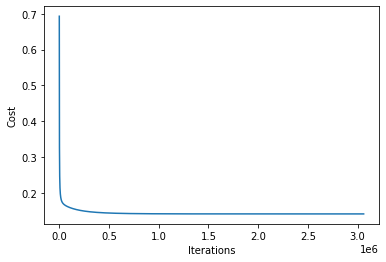

In [7]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [8]:
def accuracy(X, Y, W):
    X = np.hstack((X,np.ones((X.shape[0],1))))
    Z = W @ X.T
    A = sigmoid(Z)
    A = A > 0.5
    A = np.array(A, dtype = 'int64')
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[0])*100
    print('Training accuracy : ', round(acc, 2), "%")
    
accuracy(X, y, weights)

Training accuracy :  93.0 %


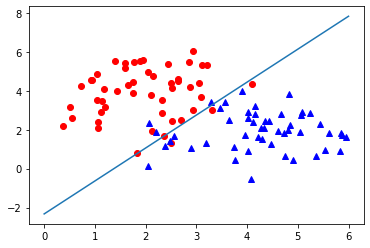

In [9]:
xo = np.linspace(0, 6, num=50)
yo = (xo*weights[0]+weights[2])/-weights[1]
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')
plt.plot(xo, yo)
plt.show()